In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_treinamento = pd.read_csv('../arquivos_csv/treinamento3.csv', low_memory=False)
df_teste = pd.read_csv('../arquivos_csv/teste3.csv', low_memory=False)


#### Payment_of_Min_Amount

In [57]:
df_treinamento['Payment_of_Min_Amount'] = df_treinamento['Payment_of_Min_Amount'].map({'Yes': 1, 'No': 0})
print(df_treinamento['Payment_of_Min_Amount'].unique())

df_teste['Payment_of_Min_Amount'] = df_teste['Payment_of_Min_Amount'].map({'Yes': 1, 'No': 0})
print(df_teste['Payment_of_Min_Amount'].unique())


[ 0. nan  1.]
[ 0. nan  1.]


#### Credit_Mix

In [58]:
df_treinamento['Credit_Mix'] = df_treinamento['Credit_Mix'].fillna('Unknown')
df_teste['Credit_Mix'] = df_teste['Credit_Mix'].fillna('Unknown')


            Auto_Loan  Credit-Builder_Loan  Debt_Consolidation_Loan  \
Credit_Mix                                                            
Bad          0.503397             0.528517                 0.499921   
Good         0.185931             0.191725                 0.197724   
Standard     0.282108             0.289317                 0.287700   
Unknown      0.306264             0.320475                 0.308987   

            Home_Equity_Loan  Mortgage_Loan  Not_Specified  Payday_Loan  \
Credit_Mix                                                                
Bad                 0.521038       0.523566       0.508452     0.523408   
Good                0.196943       0.196121       0.412006     0.206188   
Standard            0.286165       0.285507       0.401190     0.289317   
Unknown             0.310671       0.308492       0.434315     0.318544   

            Personal_Loan  Student_Loan  
Credit_Mix                               
Bad              0.509032      0.50460

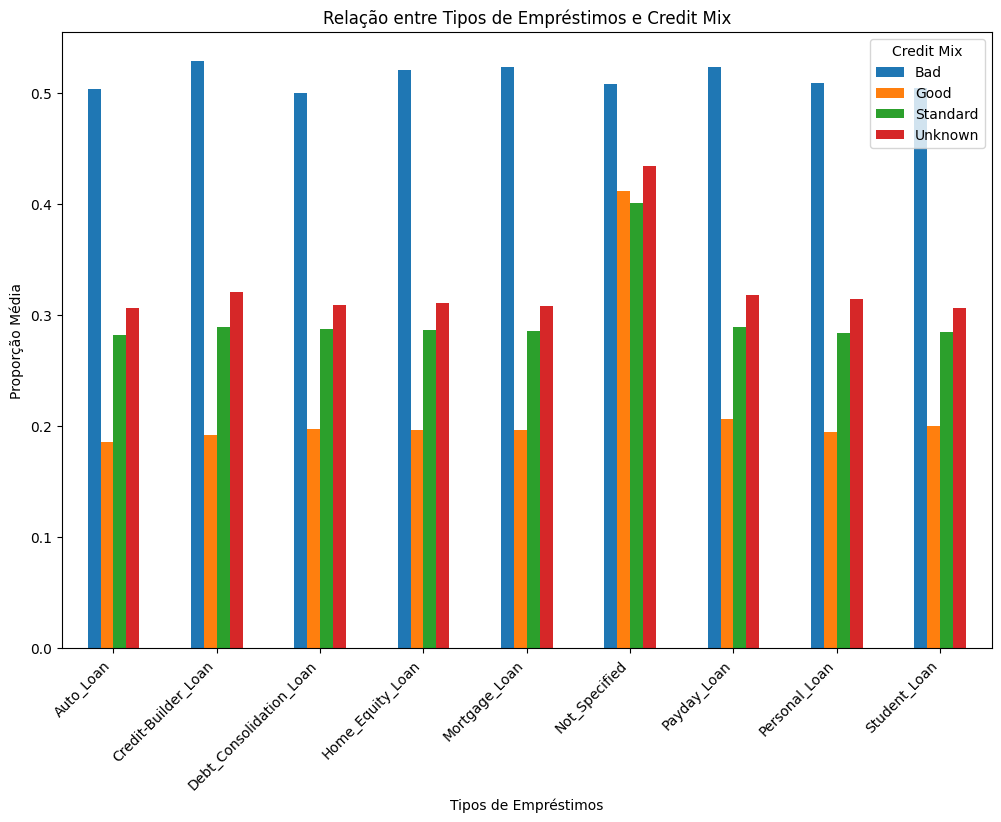

In [59]:
loan_attributes = ['Auto_Loan', 'Credit-Builder_Loan', 'Debt_Consolidation_Loan', 
                   'Home_Equity_Loan', 'Mortgage_Loan', 'Not_Specified', 
                   'Payday_Loan', 'Personal_Loan', 'Student_Loan']

# Calculando a média dos atributos binários agrupados por 'Credit_Mix'
relation_with_credit_mix = df_treinamento.groupby('Credit_Mix')[loan_attributes].mean()
print(relation_with_credit_mix)

relation_with_credit_mix.T.plot(kind='bar', figsize=(12, 8))
plt.title('Relação entre Tipos de Empréstimos e Credit Mix')
plt.xlabel('Tipos de Empréstimos')
plt.ylabel('Proporção Média')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Credit Mix')
plt.show()

In [60]:
# Calculando a diferença entre as proporções das categorias 'Unknown' e 'Bad'
differences = relation_with_credit_mix.loc['Unknown'] - relation_with_credit_mix.loc['Bad']

# Exibindo as diferenças
print("Diferença entre 'Unknown' e 'Bad' para cada tipo de empréstimo:")
print(differences)

# Calculando a média das diferenças para uma visão geral
mean_difference = differences.abs().mean()
print(f"\nMédia das diferenças absolutas entre 'Unknown' e 'Bad': {mean_difference}")


Diferença entre 'Unknown' e 'Bad' para cada tipo de empréstimo:
Auto_Loan                 -0.197133
Credit-Builder_Loan       -0.208041
Debt_Consolidation_Loan   -0.190934
Home_Equity_Loan          -0.210368
Mortgage_Loan             -0.215074
Not_Specified             -0.074137
Payday_Loan               -0.204864
Personal_Loan             -0.194548
Student_Loan              -0.198294
dtype: float64

Média das diferenças absolutas entre 'Unknown' e 'Bad': 0.18815470526200073


##### Transformando para numerico

In [61]:
credit_mix_mapping = {'Bad': 0, 'Standard': 1, 'Good': 2, 'Unknown': -1}
df_treinamento['Credit_Mix'] = df_treinamento['Credit_Mix'].map(credit_mix_mapping)
df_teste['Credit_Mix'] = df_teste['Credit_Mix'].map(credit_mix_mapping)


#### Payment_Behaviour

In [62]:
payment_behaviour_mapping = {
    'High_spent_Small_value_payments' : 0,
    'Low_spent_Large_value_payments'  : 1,
    'Low_spent_Medium_value_payments' : 2,
    'Low_spent_Small_value_payments'  : 3,
    'High_spent_Medium_value_payments': 4,
    'High_spent_Large_value_payments' : 5,
    None: -1
}

df_treinamento['Payment_Behaviour'] = df_treinamento['Payment_Behaviour'].map(payment_behaviour_mapping)
df_teste['Payment_Behaviour'] = df_teste['Payment_Behaviour'].map(payment_behaviour_mapping)


## Salvando Dados

In [63]:
# df_treinamento.to_csv('../arquivos_csv/treinamento3.csv', index=False)
# df_teste.to_csv('../arquivos_csv/teste3.csv', index=False)